In [1]:
import pandas as pd

In [2]:
pitches = pd.read_csv('data/pitches.csv')

In [3]:
pitches.tail()

,Season,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%
12,2014,57.7 %,91.8,13.7 %,83.7,6.2 %,87.7,9.9 %,77.4,10.4 %,83.3,1.6 %,84.2,0.5 %,75.7,0.5 %
13,2015,57.7 %,92.1,14.8 %,84.0,5.6 %,87.7,9.1 %,77.9,10.8 %,83.5,1.4 %,84.1,0.6 %,75.3,0.5 %
14,2016,56.7 %,92.3,15.2 %,84.1,5.7 %,87.9,10.2 %,77.9,10.3 %,83.6,1.4 %,84.5,0.6 %,74.5,0.5 %
15,2017,55.6 %,92.8,16.3 %,84.4,5.5 %,88.5,10.6 %,78.6,10.3 %,84.2,1.3 %,84.3,0.4 %,76.6,0.5 %
16,2018,55.3 %,92.7,16.4 %,84.1,5.8 %,88.5,10.3 %,79.0,10.8 %,84.2,1.3 %,85.3,0.1 %,75.0,0.5 %


Flipped the data so latest season is first

In [4]:
pitch_velo = pitches[['Season','FBv','FB%','SLv','SL%','CBv','CB%','CHv','CH%']].sort_values(by=['Season'],ascending=False)
pitch_velo.head()

,Season,FBv,FB%,SLv,SL%,CBv,CB%,CHv,CH%
16,2018,92.7,55.3 %,84.1,16.4 %,79.0,10.3 %,84.2,10.8 %
15,2017,92.8,55.6 %,84.4,16.3 %,78.6,10.6 %,84.2,10.3 %
14,2016,92.3,56.7 %,84.1,15.2 %,77.9,10.2 %,83.6,10.3 %
13,2015,92.1,57.7 %,84.0,14.8 %,77.9,9.1 %,83.5,10.8 %
12,2014,91.8,57.7 %,83.7,13.7 %,77.4,9.9 %,83.3,10.4 %


In [5]:
batting = pd.read_csv('data/by_year_bat_avg.csv')

In [6]:
batting.columns

Index(['Year', 'Tms', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [7]:
batting_clean = batting[['Year','R/G','HR','R','SO','BA']][batting.Year >= 2002]

In [8]:
batting_clean.head()

,Year,R/G,HR,R,SO,BA
0,2018,4.39,1.15,4.39,8.51,0.246
1,2017,4.65,1.26,4.65,8.25,0.255
2,2016,4.48,1.16,4.48,8.03,0.255
3,2015,4.25,1.01,4.25,7.71,0.254
4,2014,4.07,0.86,4.07,7.70,0.251


In [9]:
batting_new_col = batting_clean.columns.values
batting_new_col[0] = 'Season'
batting_clean.columns = batting_new_col
batting_clean.head()

,Season,R/G,HR,R,SO,BA
0,2018,4.39,1.15,4.39,8.51,0.246
1,2017,4.65,1.26,4.65,8.25,0.255
2,2016,4.48,1.16,4.48,8.03,0.255
3,2015,4.25,1.01,4.25,7.71,0.254
4,2014,4.07,0.86,4.07,7.70,0.251


In [10]:
merged = batting_clean.set_index('Season', drop=False).join(pitch_velo.set_index('Season'))
merged.head()

,Season,R/G,HR,R,SO,BA,FBv,FB%,SLv,SL%,CBv,CB%,CHv,CH%
Season,,,,,,,,,,,,,,
2018,2018,4.39,1.15,4.39,8.51,0.246,92.7,55.3 %,84.1,16.4 %,79.0,10.3 %,84.2,10.8 %
2017,2017,4.65,1.26,4.65,8.25,0.255,92.8,55.6 %,84.4,16.3 %,78.6,10.6 %,84.2,10.3 %
2016,2016,4.48,1.16,4.48,8.03,0.255,92.3,56.7 %,84.1,15.2 %,77.9,10.2 %,83.6,10.3 %
2015,2015,4.25,1.01,4.25,7.71,0.254,92.1,57.7 %,84.0,14.8 %,77.9,9.1 %,83.5,10.8 %
2014,2014,4.07,0.86,4.07,7.70,0.251,91.8,57.7 %,83.7,13.7 %,77.4,9.9 %,83.3,10.4 %


In [11]:
batted_ball = pd.read_csv('data/batted_ball.csv')

In [12]:
batted_ball_stripped = batted_ball[['Season','HR/FB','Soft%','Med%','Hard%']]

In [13]:
batted_ball_stripped.head()

,Season,HR/FB,Soft%,Med%,Hard%
0,2002,10.7 %,15.1 %,62.6 %,22.4 %
1,2003,11.2 %,15.9 %,60.5 %,23.6 %
2,2004,11.2 %,14.5 %,58.9 %,26.6 %
3,2005,10.6 %,15.8 %,56.4 %,27.8 %
4,2006,10.8 %,11.2 %,61.6 %,27.2 %


In [14]:
merged2 = merged.join(batted_ball_stripped.set_index('Season'))

In [15]:
merged2.head()

,Season,R/G,HR,R,SO,BA,FBv,FB%,SLv,SL%,CBv,CB%,CHv,CH%,HR/FB,Soft%,Med%,Hard%
Season,,,,,,,,,,,,,,,,,,
2018,2018,4.39,1.15,4.39,8.51,0.246,92.7,55.3 %,84.1,16.4 %,79.0,10.3 %,84.2,10.8 %,12.6 %,18.1 %,46.3 %,35.6 %
2017,2017,4.65,1.26,4.65,8.25,0.255,92.8,55.6 %,84.4,16.3 %,78.6,10.6 %,84.2,10.3 %,13.7 %,18.9 %,49.3 %,31.8 %
2016,2016,4.48,1.16,4.48,8.03,0.255,92.3,56.7 %,84.1,15.2 %,77.9,10.2 %,83.6,10.3 %,12.8 %,18.8 %,49.9 %,31.4 %
2015,2015,4.25,1.01,4.25,7.71,0.254,92.1,57.7 %,84.0,14.8 %,77.9,9.1 %,83.5,10.8 %,11.4 %,18.6 %,52.5 %,28.8 %
2014,2014,4.07,0.86,4.07,7.70,0.251,91.8,57.7 %,83.7,13.7 %,77.4,9.9 %,83.3,10.4 %,9.5 %,18.3 %,52.6 %,29.1 %


In [16]:
import numpy as np

In [17]:
soft = np.array(merged2['Soft%'])
med = np.array(merged2['Med%'])
hard = np.array(merged2['Hard%'])
hr_fb = np.array(merged2['HR/FB'])

In [18]:
soft[0][:-2]

'18.1'

In [19]:
def remove_percent(contact):
    no_perc = []
    for perc in contact:
        no_perc = np.append(no_perc, np.array(float(perc[:-2])))
    return no_perc

In [20]:
soft_clean = remove_percent(soft)
med_clean = remove_percent(med)
hard_clean = remove_percent(hard)
hr_fb_clean = remove_percent(hr_fb)

In [21]:
soft_clean

array([18.1, 18.9, 18.8, 18.6, 18.3, 16.5, 15.7, 24.3, 18.1, 15.7, 16.9,
       18.2, 11.2, 15.8, 14.5, 15.9, 15.1])

In [22]:
soft_df = pd.DataFrame(soft_clean)
med_df = pd.DataFrame(med_clean)
hard_df = pd.DataFrame(hard_clean)
hr_fb_df = pd.DataFrame(hr_fb_clean)

In [23]:
merged2['Soft%'] = soft_df[0].values
merged2['Med%'] = med_df[0].values
merged2['Hard%'] = hard_df[0].values
merged2['HR/FB'] = hr_fb_df[0].values

In [24]:
merged2.head()

,Season,R/G,HR,R,SO,BA,FBv,FB%,SLv,SL%,CBv,CB%,CHv,CH%,HR/FB,Soft%,Med%,Hard%
Season,,,,,,,,,,,,,,,,,,
2018,2018,4.39,1.15,4.39,8.51,0.246,92.7,55.3 %,84.1,16.4 %,79.0,10.3 %,84.2,10.8 %,12.6,18.1,46.3,35.6
2017,2017,4.65,1.26,4.65,8.25,0.255,92.8,55.6 %,84.4,16.3 %,78.6,10.6 %,84.2,10.3 %,13.7,18.9,49.3,31.8
2016,2016,4.48,1.16,4.48,8.03,0.255,92.3,56.7 %,84.1,15.2 %,77.9,10.2 %,83.6,10.3 %,12.8,18.8,49.9,31.4
2015,2015,4.25,1.01,4.25,7.71,0.254,92.1,57.7 %,84.0,14.8 %,77.9,9.1 %,83.5,10.8 %,11.4,18.6,52.5,28.8
2014,2014,4.07,0.86,4.07,7.70,0.251,91.8,57.7 %,83.7,13.7 %,77.4,9.9 %,83.3,10.4 %,9.5,18.3,52.6,29.1


In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = (6, 6)

Text(0.5,1,'SO per Game vs Avg FB Velocity')

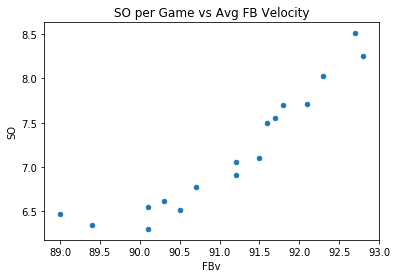

In [26]:
merged2.plot.scatter(x='FBv',y='SO');
plt.title('SO per Game vs Avg FB Velocity')

Makes sense that there are more strikeouts per game as the fastball gets faster.

Text(0.5,1,'Hard Hit% vs Avg FB Velocity')

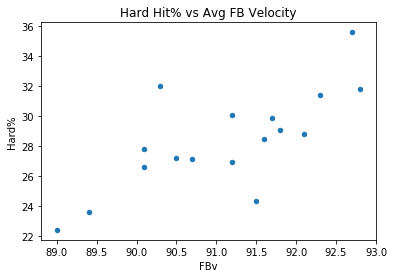

In [27]:
merged2.plot.scatter(x='FBv',y='Hard%');
plt.title('Hard Hit% vs Avg FB Velocity')

Not as correlated as SO/G vs FBv, but good indication that faster fastballs get hit harder

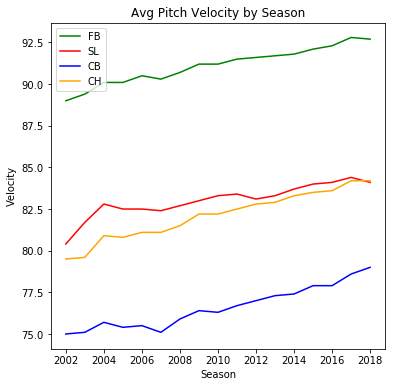

In [28]:
plt.rcParams["figure.figsize"] = (6, 6)
fb = plt.plot(merged2.Season, merged2.FBv, color='g', label='FB')
sl = plt.plot(merged2.Season, merged2.SLv, color='red', label='SL')
cb = plt.plot(merged2.Season, merged2.CBv, color='blue', label='CB')
ch = plt.plot(merged2.Season, merged2.CHv, color='orange', label='CH')
plt.xlabel('Season')
plt.ylabel('Velocity')
plt.title('Avg Pitch Velocity by Season')
plt.legend(handles=(fb[0], sl[0], cb[0], ch[0]), labels=('FB','SL','CB','CH'))
plt.show();

In fact, the four major types of pitches have all been thrown harder.

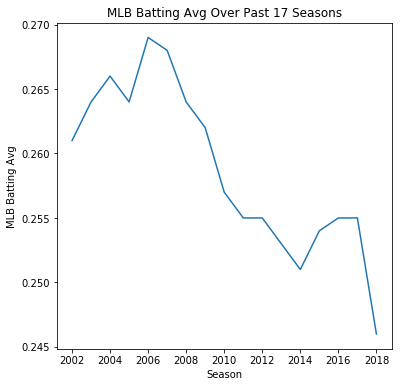

In [29]:
plt.plot(merged2.Season, merged2.BA)
plt.ylabel('MLB Batting Avg')
plt.xlabel('Season')
plt.title('MLB Batting Avg Over Past 17 Seasons')
plt.show();

# Takeaways

1. Increasing fastball velocity is contributing to the increasing strikeout rate.
    - All pitches have been getting faster; makes sense has teams prefer harder throwers.
2. As pitches get faster, they're being hit harder as well.
    - Would explain the increasing rate of homeruns over the past few years.
3. Hitters are getting worse at hitting as well. In addition as batters get older, they'd have more trouble catching up to the fastball.


* Creds to FanGraphs and Baseball Reference for the data. Let's go Yankees!